In [1]:
import requests, bs4
import pandas as pd
import numpy as np
import os
from pathlib import Path
import time
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
pip install selenium

     |████████████████████████████████| 7.2 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 400 kB 29.3 MB/s eta 0:00:01
     |████████████████████████████████| 158 kB 35.2 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 30.5 MB/s eta 0:00:01
  Attempting uninstall: certifi
    Found existing installation: certifi 2020.12.5
    Uninstalling certifi-2020.12.5:
      Successfully uninstalled certifi-2020.12.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# list of stocks S&P 500 
list_stocks = pd.read_excel("/Users/hannahmeyerzutittingdorf/Documents/Uni/Master/Masterarbeit/Daten/List S&P 500.xlsx")
list_stocks = list_stocks.iloc[:,0:6]

# safe stock symbols as array
stocks = list_stocks['Symbol'].to_numpy()



# Web Scrapping
I download data with realized volatility of the S&P 500 stocks from the website https://dachxiu.chicagobooth.edu. The data is based on intraday data. 

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [94]:
# open website
driver = webdriver.Firefox()
driver.get('https://dachxiu.chicagobooth.edu')

for i in range(len(stocks)):
    # search for stock
    search_input = driver.find_element(By.ID, "ticker")
    search_input.send_keys(stocks[i]+" ")
    suggestion = WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.XPATH, "//*[@class='symbol-one']")))
    driver.execute_script("arguments[0].click();", suggestion)

    # click download button
    time.sleep(5)
    download = driver.find_element(By.ID, "data-download")
    driver.execute_script("arguments[0].click();", download)

    # click download in window
    download_link = driver.find_element(By.ID, "download-link")
    driver.execute_script("arguments[0].click();", download_link)

    # rename download document
    new_name = "/Users/hannahmeyerzutittingdorf/Downloads/" + stocks[i] + ".csv"
    time.sleep(5)
    os.rename("/Users/hannahmeyerzutittingdorf/Downloads/download.csv", new_name)
    #os.remove("/Users/hannahmeyerzutittingdorf/Downloads/download.csv")

    # reload website
    driver.refresh()

# close Browser when done
driver.quit()

# Data Processing

In [306]:
# Speciality with Google and Alphabet
# GOOG 90319 is at Website Google INC
# GOOG 14542 is Alphabet INC 
# rename GOOG 90139 to GOOGL
googl = pd.read_csv("/Users/hannahmeyerzutittingdorf/Documents/Uni/Master/Masterarbeit/Daten/Stockdata/GOOGL.csv")
googl['Symbol'] = 'GOOGL'
googl.to_csv("/Users/hannahmeyerzutittingdorf/Documents/Uni/Master/Masterarbeit/Daten/Stockdata/GOOGL.csv")

In [122]:
# speciality with BRK.B and BF.B
# named on website BRK/B and BF/B
# problems with /
# rename to BRKB and BFB
brkb = pd.read_csv("/Users/hannahmeyerzutittingdorf/Documents/Uni/Master/Masterarbeit/Daten/Stockdata/BRKB.csv")
brkb['Symbol'] = 'BRKB'
brkb.to_csv("/Users/hannahmeyerzutittingdorf/Documents/Uni/Master/Masterarbeit/Daten/Stockdata/BRKB.csv")

bfb = pd.read_csv("/Users/hannahmeyerzutittingdorf/Documents/Uni/Master/Masterarbeit/Daten/Stockdata/BFB.csv")
bfb['Symbol'] = 'BFB'
bfb.to_csv("/Users/hannahmeyerzutittingdorf/Documents/Uni/Master/Masterarbeit/Daten/Stockdata/BFB.csv")

In [4]:
#empty dataframe
data = pd.DataFrame({'Symbol' : [], 'PN' : [], 'Type' : [], 'Date' : [], 'Volatility' : []})

path = "/Users/hannahmeyerzutittingdorf/Documents/Uni/Master/Masterarbeit/Daten/Stockdata/"

#list for all missing stocks
not_exist = []

#loop over all stocks
for i in range(len(stocks)):
    stock_name = stocks[i]
    file = Path(path + stock_name + ".csv")
    
    # check if file exists
    if file.is_file():
        stock = pd.read_csv(path + stock_name + ".csv")
        
        #without the data from the SPY ETF. which was as example on the website
        data = pd.concat([data, stock[stock['Symbol'] != 'SPY']])
    else:
        not_exist.append(stock_name)
        
# delete Unnamed:0 column
data.drop('Unnamed: 0', inplace = True, axis = 1)

In [323]:
not_exist

# AAL American Airlines Group -> 2011 to 2014 is missing

# CB Chubb Limited -> former ACE, data is missing between 2006 and 2016

# CEG Constellation Energy -> splitted of from Exelon in 2022

# EG Everest RE Group -> former Prudential Reinsurance as part of Prudential finance (already included)
# cannot find EG

# GEHC GE HeathCare -> was part of General Electric (already included) until January 2023 

# KVUE -> Kenvue -> new company: 2022, former healthcare division of Johnson&Johnson
# Johnson&Johnson is already included

# JCI Johnson Controls -> data is missing between 2006 and 2017

# PARA Paramount Global -> founded as ViacomCBS in 2019 
# cannot find it, but not as important because relatively new company 
# -> will not be included because of short timeline

# PLD Prologis -> AMB, but data missing between 2006 and 2011

# RVTY Revvity -> founded May 2023

# STE Steris -> 2015 to 2019 is missing

# WBD Warner Bros Discovery -> founded April 2022

# WELL Welltower -> former HCN but data is missing between 2006 and 2018

# WLTW Willis Towers Watson -> data is missing between 2006 and 2016

['AAL',
 'ACE',
 'AMB',
 'CEG',
 'EG',
 'GEHC',
 'JCI',
 'KVUE',
 'PARA',
 'RVTY',
 'STE',
 'WBD',
 'WELL',
 'WLTW']

In [5]:
# delete not existing stocks from the list of stocks
stocks = [s for s in stocks if s not in not_exist]
list_stocks = list_stocks[~list_stocks['Symbol'].isin(not_exist)]

In [6]:
# delete column PN
data.drop('PN', inplace = True, axis = 1)

In [7]:
# add GICS Sector
data = pd.merge(data, list_stocks[['Symbol', 'GICS Sector']], on = 'Symbol', how = 'outer')

# check if a stock is missing
missing = data[data['Type'].isna()]
stocks_missing = np.array(missing['Symbol'])
stocks_missing

array([], dtype=object)

In [327]:
# convert Date to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# split into trades and quotes
data_trade = data[data['Type'] == 'QMLE-Trade']
data_quote = data[data['Type'] == 'QMLE-Quote']

# reset index
data_trade = data_trade.reset_index()
data_quote = data_quote.reset_index()

data_trade.drop('index', inplace = True, axis = 1)
data_quote.drop('index', inplace = True, axis = 1)

In [328]:
# save as .csv
data_trade.to_csv("/Users/hannahmeyerzutittingdorf/Documents/Uni/Master/Masterarbeit/Daten/data_trade_original.csv")
data_quote.to_csv("/Users/hannahmeyerzutittingdorf/Documents/Uni/Master/Masterarbeit/Daten/data_quote_original.csv")

# Data Analysis

In [3]:
# function for cutting time line from the right side
def cutting_data_after(data, cutting_date):
    '''
    input: dataframe and cutting_date as string
    output: cutted dataframe
    cuts the timeline on the right side 
    
    '''
    # group by stock and sort each stock by date
    grouped = data.groupby('Symbol')
    sorted_grouped = grouped.apply(lambda x: x.sort_values('Date'))
    
    # Reset index
    data = data.reset_index(drop=True)
    
    # delete rows with Date larger or equal to cutting date
    data = data[data['Date'] < cutting_date]
    
    return data


In [4]:
# function for deleting complete stock which have a too short timeline 
# cut timeline of remaining stocks from the left
def cutting_data_before(data, cutting_date):
    '''
    input: dataframe and cutting_date as string
    output: cutted dataframe
    cuts the timeline on the left side and deletes stocks with a too short timeline
    '''
    # group data by stock
    grouped_stock = data.groupby('Symbol')
    
    # date where to cut timeline
    date = datetime.strptime(cutting_date, '%Y-%m-%d')

    # filter all groups which have a timeline at this date and not later
    filtered_groups = grouped_stock.filter(lambda group: group.iloc[0]['Date'] <= date)
    
    # reset index
    filtered_groups = filtered_groups.reset_index(drop = True)
    
    # delete rows with Date smaller than cutting date
    filtered_groups = filtered_groups[filtered_groups['Date'] >= date]
    
    return filtered_groups

In [27]:
# load data
data_trade = pd.read_csv("/Users/hannahmeyerzutittingdorf/Documents/Uni/Master/Masterarbeit/Daten/data_trade_original.csv",
                        index_col = 'Unnamed: 0')
data_quote = pd.read_csv("/Users/hannahmeyerzutittingdorf/Documents/Uni/Master/Masterarbeit/Daten/data_quote_original.csv",
                        index_col = 'Unnamed: 0')

In [28]:
# convert Date to datetime format
data_trade['Date'] = pd.to_datetime(data_trade['Date'])
data_quote['Date'] = pd.to_datetime(data_quote['Date'])

In [29]:
# cutting data on the right side
data_trade = cutting_data_after(data_trade, '2023-08-01')
data_quote = cutting_data_after(data_quote, '2023-08-01')

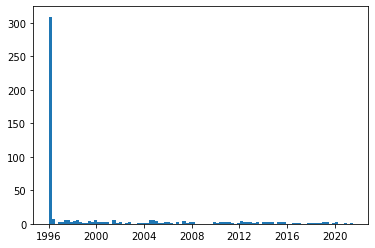

In [132]:
# need to find the optimal period length
# filter the start of the timeline for each stock
grouped_stock = data_trade.groupby('Symbol')
start_timeline = grouped_stock.first()

plt.hist(start_timeline['Date'], bins = 100)

plt.show()
# timelines for 317 stocks start in 1996

In [30]:
# cutting data on the left side and delete stocks with too short timeline
# 2004-08-19 leads to 19 years
data_trade = cutting_data_before(data_trade, '2014-08-08')
data_quote = cutting_data_before(data_quote, '2014-08-08')

In [20]:
# number of trading days of S&P 500
import yfinance as yf

stock_symbol = "AAPL"

# start and end dates
start_date = "2014-08-08"
end_date = "2023-08-01"

# fecth historical data
data_history = yf.download(stock_symbol, start = start_date, end=end_date)

# Extract the trading days from the data
trading_days = data_history.index.date.tolist()

n_days = len(trading_days)

[*********************100%***********************]  1 of 1 completed


In [24]:
# it is easier for training the models if the number of days can be divided by 251
n_days/251, n_days

(9.0, 2259)

In [21]:
# some datapoints are missing
# therefore difference in length of timeline betweeen stocks
# fill the missing spots with mean

counts = data_trade['Symbol'].value_counts().reset_index(name='count')
counts = counts.sort_values(by ='count')
counts = counts.reset_index(drop=True)
counts

# CME data points misisng but relative equally distributed -> around 1000 missing
# all others around 4700

,index,count
0,MM,305
1,TAP,326
2,FOXA,1159
3,FRT,2172
4,J,2181
...,...,...
433,NKE,2245
434,AFL,2245
435,CPRT,2245
436,MCK,2246


In [22]:
# function for filling the missing values with the mean of the days before and the days afterwards
def filling_missing_values(df):
    '''
    input: dataframe with date, Symbol, Type, Volatility, GICS Sector
    output: dataframe with date, Symbol, Type, Volatility, GICS Sector but with values for all trading days
    -> timeline of every stock has same length
    the missing values are filled with the mean of the days before and the days afterwards
    '''
    filled_df = pd.DataFrame(columns=['Date', 'Symbol', 'Type', 'Volatility','GICS Sector'])

    for symbol, group in df.groupby('Symbol'):

        #Need GICS Sector for filling missing values
        gics = group.iloc[0, 4]

        # delet duplicates (do not know why there are duplicates)
        group.drop_duplicates(subset='Date', inplace=True)
        # Reindex the group to include the full date range
        group = group.set_index('Date').reindex(trading_days)

        # Fill missing values with the mean of the days before and the days afterwards
        volatility = pd.concat([group['Volatility'].fillna(method='ffill'),  
                           group['Volatility'].fillna(method='bfill')], axis=1).mean(axis=1)
        
        group['Volatility'] = volatility

        # Fill Symbol
        group['Symbol'].fillna(symbol, inplace = True)

        # Fill GICS Sector
        group['GICS Sector'].fillna(gics, inplace = True)

        # Reset the index and add the filled group to the new DataFrame
        group = group.reset_index()
        filled_df = pd.concat([filled_df, group], ignore_index=True)



    # Sort the filled DataFrame by 'Stock' and 'Date' if needed
    filled_df.sort_values(by=['Symbol', 'Date'], inplace=True)

    # If needed, reset the index
    filled_df.reset_index(drop=True, inplace=True)
    
    return filled_df


In [31]:
# fill the missing values in the dataframes
data_trade = filling_missing_values(data_trade)
data_trade['Type'] = 'QMLE-Trade'

data_quote = filling_missing_values(data_quote)
data_quote['Type'] = 'QMLE-Quote'

In [32]:
# Check 
# length of  df/trading days should be number of stocks
# no NaNs should be left
len(data_trade)/n_days, len(data_quote)/n_days, len(data_trade[data_trade['Volatility'].isna()]), len(data_quote[data_quote['Volatility'].isna()])


(438.0, 438.0, 0, 0)

In [33]:
# save as .csv
data_trade.to_csv("/Users/hannahmeyerzutittingdorf/Documents/Uni/Master/Masterarbeit/Daten/data_trade.csv")
data_quote.to_csv("/Users/hannahmeyerzutittingdorf/Documents/Uni/Master/Masterarbeit/Daten/data_quote.csv")